In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [2]:
def Phase( t, p):
    phase = []    
    phase = (t/(p))- np.fix(t/(p))
    return (phase)


def T_0_fixer(T0,t,p, phase):
    phase0 = (T0/(p))- np.fix(T0/(p))
    phase = phase - phase0 - (0.25)
    for i in np.arange(len(phase)):
        if phase[i]<0:
            phase[i]=phase[i]+1
        if phase[i]>1:
            phase[i]=phase[i]-1
    return (phase)


def JDfixer(t):
    if t[0]>10000:
        t = t - 2450000
    return (t)

In [3]:
KELT_bins = 250

In [4]:
data = np.loadtxt('KELT_N04_lc_040968_V01_comb_raw.dat')

In [5]:
df = pd.DataFrame({'t':data[:,0], 'm':data[:,1], 'e':data[:,2]})

In [6]:
# df = pd.read_csv('data/AP18201061.csv')
# df = df.rename(columns={'hjd': 't', 'mag': 'm', 'mag err': 'e'})

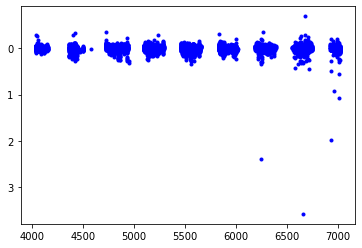

In [7]:
plt.plot(df.t, df.m, 'b.')
plt.gca().invert_yaxis()

In [8]:
np.median(df.m)

0.0

In [9]:
df['m_median'] = df.m - np.median(df.m)

In [10]:
x = df.t.values
y = df.m_median.values
y_unc = df.e.values

In [11]:
from astropy.stats import LombScargle
frequency, power = LombScargle(x, y, y_unc).autopower()

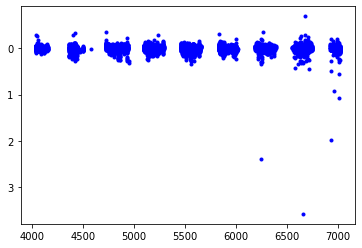

In [12]:
plt.plot(x, y, 'b.')
plt.gca().invert_yaxis()

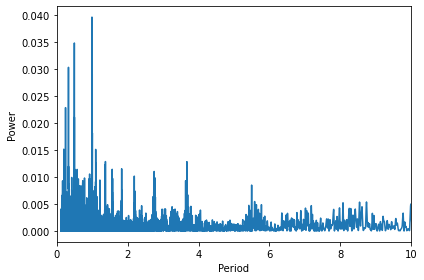

In [13]:
fig, ax = plt.subplots()

ax.plot(1/frequency, power)
ax.set_ylabel('Power')
ax.set_xlabel('Period')
ax.set_xlim(0,10)
# ax.set_ylim(0,1)
fig.tight_layout()

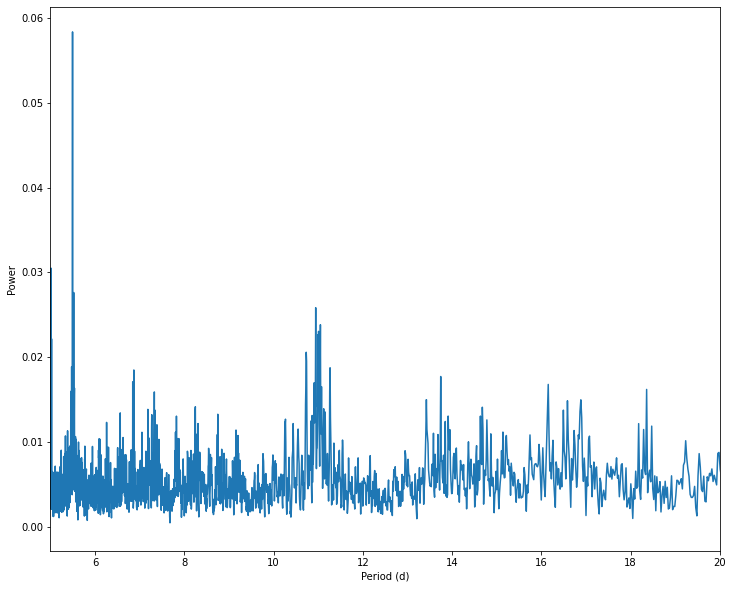

In [15]:
ls = LombScargle(x, y,y_unc, nterms = 5)
### nterm=5
freq_window, power_window = ls.autopower(1/20, maximum_frequency=1./5.)

fig, ax = plt.subplots()
ax.plot(1/freq_window, power_window)
ax.set_ylabel("Power")
ax.set_xlabel("Period (d)")
ax.set_xlim(5,20)
fig.set_size_inches(12.0,10.0)

# axins = plt.axes([.2, .65, .5, .2])
# axins.plot(1/freq_window, power_window)
# axins.set_xlim(0,0.3)

In [17]:
1./freq_window[np.argmax(power_window)]

5.497202960471493

In [18]:
p = 2*(1./freq_window[np.argmax(power_window)])
t0 = 2456924.6845
t_kelt = JDfixer(df.t)
phase = Phase(t_kelt, p)
phase = T_0_fixer(t0, t_kelt, p, phase)

In [19]:
m_kelt = df.m_median
# sort=np.sort(m_kelt)
max_m=((30*(max(m_kelt)-min(m_kelt)))/100)+min(m_kelt)
min_m=((10*(max(m_kelt)-min(m_kelt)))/100)+min(m_kelt)


(med_stat_kelt, bin_edges, binnumber) = st.binned_statistic(phase,m_kelt,statistic='median',bins=KELT_bins)
r = (bin_edges[1] - bin_edges[0])/2
bin_middles_kelt=[]
for k in np.arange(len(bin_edges)-1):
    bin_middles_kelt.append( bin_edges[k] + r )

(0.0, 1.0, 0.5872690000000002, -0.2686169999999999)

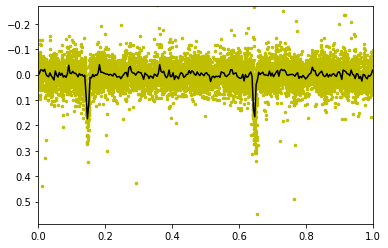

In [20]:
plt.plot(phase, m_kelt,'y.', markersize=5)
plt.plot(bin_middles_kelt, med_stat_kelt, 'k', markersize=6)
plt.axis([0,1, max_m, min_m])
